In [1]:
import pandas as pd
dataset = pd.read_csv(r"C:\Users\javte\Documents\SSEF project\datasets\full_matrix\matrix_logCPMrmBatch_20221207.csv",index_col=[0]).T

In [2]:
dataset.columns = dataset.columns.map(lambda x: x.split('.',1)[0])

In [3]:
from gprofiler import GProfiler
gp = GProfiler(return_dataframe=True)
names = gp.convert(organism='hsapiens',
            query=list(dataset.columns),
            target_namespace='WIKIGENE')

In [25]:
receptors = ["ERBB2", "ESR1", "ESR2", "PGR", "MKI67"]
dataset_filtered = dataset[names.query('name==@receptors').incoming]

In [31]:
receptor_symbols = dataset_filtered.rename(columns={"ENSG00000082175":"ERBB2",
                                  "ENSG00000091831":"ESR1",
                                  "ENSG00000140009":"ESR2",
                                 "ENSG00000141736":"PGR",
                                 "ENSG00000148773":"MKI67"})

In [42]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents_receptors = pca.fit_transform(receptor_symbols)
principal_receptors = pd.DataFrame(data = principalComponents_receptors
             , columns = ["PC"+str(i) for i in range(1, 5+1)])
principal_receptors.shape

(1190, 5)

In [43]:
metadata = pd.read_excel(r"C:\Users\javte\Documents\SSEF project\datasets\big metadata\sel_metadat_15Dec22.xlsx")

In [44]:
principal_receptors['pam50'] = metadata.pam50

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

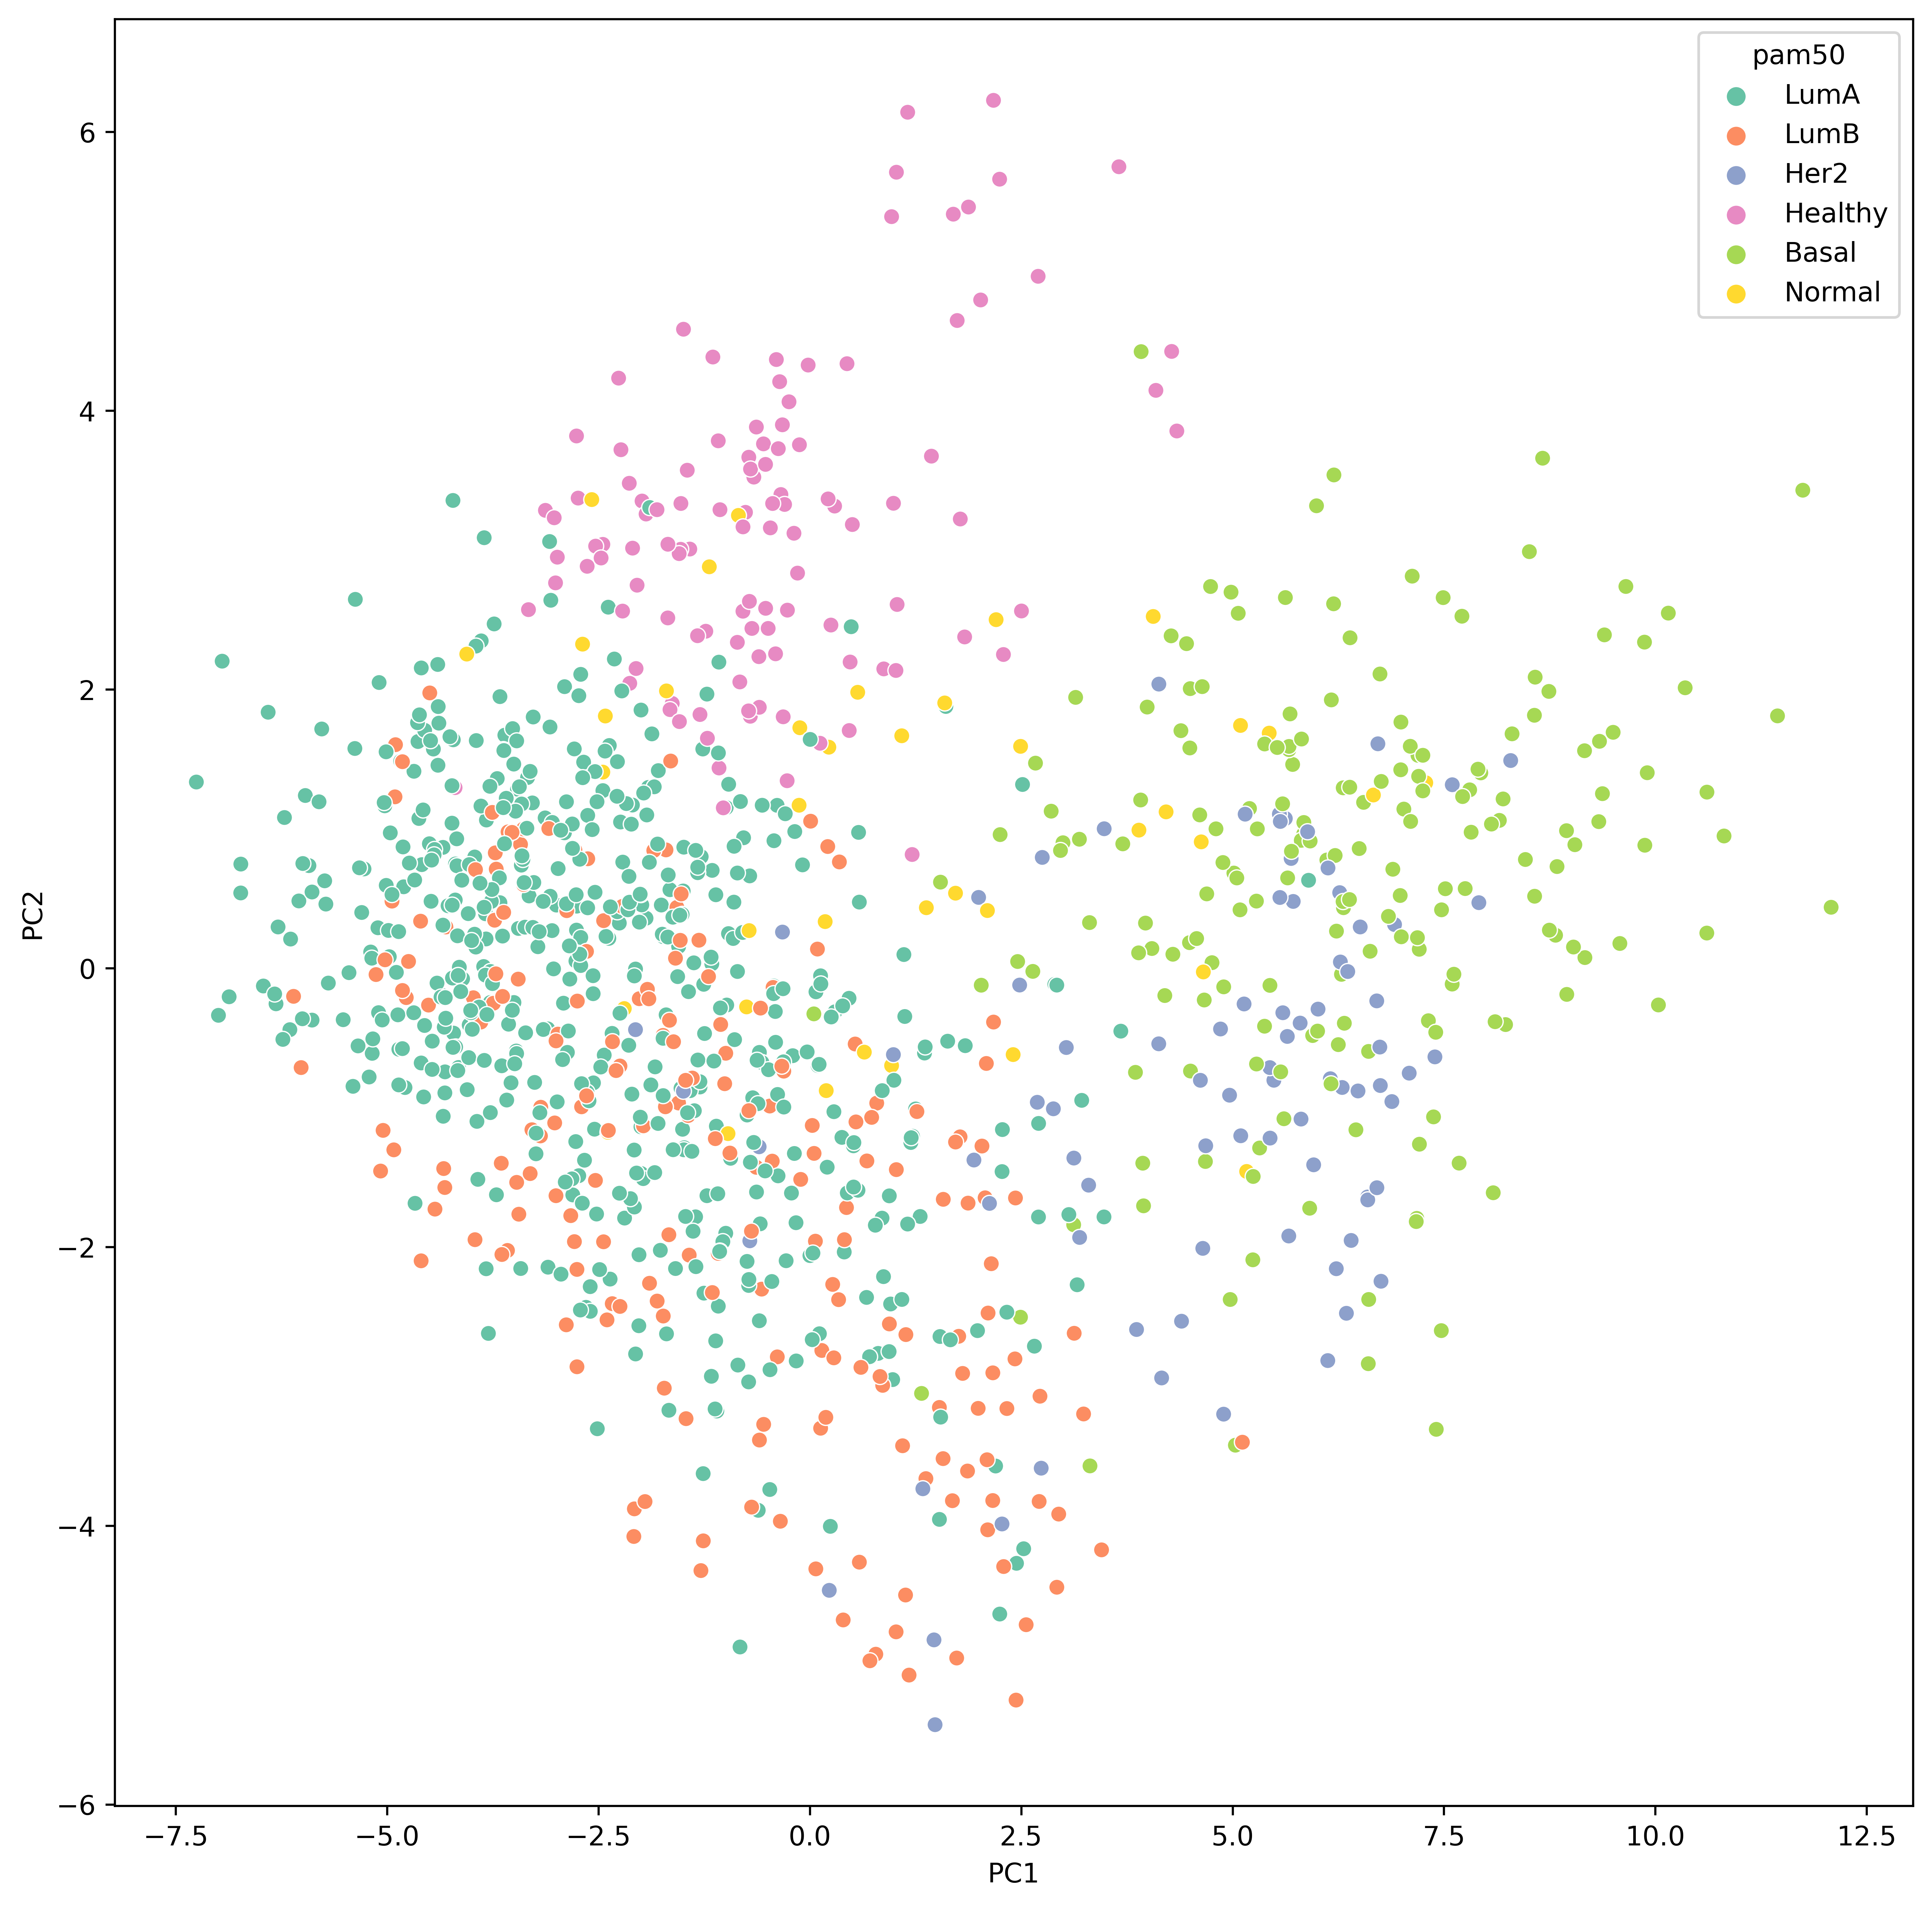

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axes = plt.subplots(1,1,dpi=600,figsize=(12,12))
sns.scatterplot(ax=axes,x=principal_receptors['PC1'],
                y=principal_receptors['PC2'],
                hue=principal_receptors['pam50'],
                palette='Set2')

In [52]:
receptor_symbols

,ERBB2,ESR1,ESR2,PGR,MKI67
TCGA-AC-A8OP-01A-11R-A36F-07,2.432012,10.823444,-1.622318,9.162394,6.095878
TCGA-D8-A1XU-01A-11R-A14M-07,5.340929,10.154951,-1.113781,7.588521,4.702064
TCGA-BH-A18L-01A-32R-A12D-07,5.960115,9.881238,-1.222892,8.929414,8.074962
TCGA-B6-A0IK-01A-12R-A056-07,3.709075,5.400489,-0.265877,8.598221,6.342301
TCGA-BH-A18L-11A-42R-A12D-07,6.557885,8.198074,1.895983,7.156401,2.328696
...,...,...,...,...,...
TCGA-GM-A2DN-01A-11R-A180-07,4.864716,8.136211,-0.587039,8.283925,6.412742
TCGA-B6-A0I1-01A-11R-A21T-07,-2.132815,1.127745,-1.859734,8.356803,6.259360
TCGA-EW-A1IW-01A-11R-A13Q-07,7.535994,8.548899,-1.187212,12.384211,6.697537
TCGA-BH-A42V-01A-11R-A24H-07,5.675222,5.941458,0.181847,8.849644,5.126441
